In [4]:
import json
import os

import matplotlib.pyplot as plt

from skimage.io import imshow, imread, imsave

json_path1 = "/home/yanglei/Classfier/result.json"
json_path2 = "/home/yanglei/Classfier/submit/99.74_resnet-18_result.json"
json_path3 = "/home/yanglei/Classfier/submit/99.72_densenet161_result.json"

In [5]:
with open(json_path1, 'r') as f1:
    result1 = json.load(f1)
with open(json_path2, 'r') as f2:
    result2 = json.load(f2)
with open(json_path3, 'r') as f3:
    result3 = json.load(f3)

In [6]:
image_list = []
info_list = []
for i in range(len(result1)):
    ret1 = result1[i]
    ret2 = result2[i]
    ret3 = result3[i]
    if ret1["image_name"] != ret2["image_name"] or ret3["image_name"] != ret2["image_name"]:
        print("image_name corrupt")
    if ret1["category"] != ret2["category"]:
        image_path = os.path.join("/home/yanglei/Classfier/dataset/test", ret1["image_name"])
        info = ret1["image_name"] + " ret1: " + ret1["category"] + " " + str(ret1["score"]) + " ret2: " + ret2["category"] + " " + str(ret2["score"]) + " ret3: " + ret3["category"] + " " + str(ret3["score"]) 
        print(info)
        if ret1["category"] == ret3["category"]:
            result1[i]["score"] = 0.5 * (result1[i]["score"] + result3[i]["score"])
        elif ret2["category"] == ret3["category"] and max(result2[i]["score"], result3[i]["score"]) > result1[i]["score"]:
            image_list.append(image_path)
            info_list.append(info)
            result1[i]["category"] = ret3["category"]
            result1[i]["score"] = 0.5 * (result2[i]["score"] + result3[i]["score"])
    else:
        result1[i]["score"] = 0.5 * (result1[i]["score"] + result2[i]["score"])
len(image_list)

572.png ret1: calling 0.5051727890968323 ret2: normal 0.8073030710220337 ret3: normal 0.9106757044792175
1317.png ret1: normal 0.532685399055481 ret2: calling 0.6881987452507019 ret3: calling 0.73131263256073
662.png ret1: calling 0.49823203682899475 ret2: smoking 0.5150152444839478 ret3: smoking 0.6240279674530029
705.png ret1: calling 0.5253407955169678 ret2: normal 0.3696390688419342 ret3: calling 0.7015172243118286
1183.png ret1: calling 0.5820314884185791 ret2: smoking 0.44504857063293457 ret3: calling 0.41036996245384216
551.png ret1: normal 0.627794086933136 ret2: smoking 0.47769683599472046 ret3: smoking 0.522605299949646
1349.png ret1: normal 0.4343484938144684 ret2: smoking 0.3656952381134033 ret3: smoking 0.5023245811462402
1434.png ret1: calling 0.7305571436882019 ret2: normal 0.4210583567619324 ret3: normal 0.4246280789375305
80.png ret1: calling 0.5519793033599854 ret2: normal 0.46491488814353943 ret3: calling 0.771049439907074
821.png ret1: smoking 0.6490089297294617 ret

11

572.png ret1: calling 0.5051727890968323 ret2: normal 0.8073030710220337 ret3: normal 0.9106757044792175


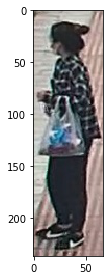

In [7]:
i = 0
imshow(imread(image_list[i]))
print(info_list[i])

In [8]:
submit_results_path = "/home/yanglei/Classfier/fusion_result.json"
with open(submit_results_path,'w') as json_file:
    json.dump(result1, json_file)